# 
<b>Q_1 and Q_3.Consider the 128-dimensional feature vectors(d=128) given in the “gender_feature_vectors.csv” file. (2 classes, male and female)<br>
a) Use PCA to reduce the dimension from d to d’.(Here d=128)<br>
b) Display the eigenvalue based on increasing order, select the d’ of the corresponding
eigenvector which is the appropriate dimension d’ ( select d’ S.T first 95% of λ values
of the covariance matrix are considered).<br>
c)Use d’ features to classify the testcases(any classification algorithm taught in class like Bayes classifier, minimum distance classifier,and so on)<br>

Dataset Specifications:<br>

Total number of samples = 800 <br>
Number of classes = 2 (labeled as “male” and “female”)<br>
Samples from “1 to 400” belongs to class “male” <br>
Samples from “401 to 800” belongs to class “female” <br>
Number of samples per class = 400 Number of dimensions = 128 <br>
Use the following information to design classifier:<br>
Number of test cases ( first10 in each class)  = 20 <br>
Number of training featurevectors ( remaining 390 in each class) = 390 <br>
Number of reduced dimensions= d’ (map 128 to d’ features vector)</b>

<br><b>Give the comparative study for the above results w.r.t to classification accuracy in terms of
the confusion matrix. </b>

In [13]:
import numpy as np
import pandas as pd
from sympy import *

In [14]:
data1=pd.read_csv("gender_feature_vectors.csv")
print(data1.head())
print(data1.shape)
df = (data1.iloc[:,2:])
print(df)
df.shape
type(df)

   Unnamed: 0 Unnamed: 1         0         1         2         3         4  \
0           1       male -0.066420  0.151611  0.027740  0.052771 -0.066105   
1           2       male -0.030614  0.049667  0.008084 -0.050324  0.007649   
2           3       male -0.096178  0.061127  0.035326 -0.035388 -0.090728   
3           4       male -0.103057  0.085044  0.078333 -0.035873 -0.028163   
4           5       male -0.125815  0.120046  0.023131 -0.042901  0.038215   

          5         6         7  ...       118       119       120       121  \
0 -0.041232 -0.002637 -0.158467  ...  0.025989 -0.001087  0.027260 -0.046754   
1 -0.063818 -0.019530 -0.119905  ...  0.044229 -0.023900 -0.028108  0.040618   
2 -0.018634 -0.024315 -0.139786  ...  0.111141  0.059436 -0.029222  0.042115   
3  0.004924  0.007829 -0.017016  ...  0.100793 -0.002644 -0.023388  0.029497   
4 -0.049677 -0.054258 -0.130758  ...  0.090197  0.067527  0.039926  0.047469   

        122       123       124       125       12

pandas.core.frame.DataFrame

In [15]:
X = df.to_numpy()

In [16]:
def Dimensionality_Reduction(X):
    # Covariance Matrix:
    X_cov=np.cov(X.transpose())
    
    #Mean:
    X_mean=np.mean(X,axis=0)
    
    #Eigen values and Eigen_Vectors:
    eigen_values,eigen_vectors=np.linalg.eig(X_cov)  # FIrst column is the 1st eigen vector and 2nd column is the 
                                                     # 2nd eigen vector and soo on!....
    
    # Sorting Eigen values in the Decreasing Order:
    idxs = np.argsort(eigen_values)[::-1]
    eigen_values = eigen_values[idxs]
    eigen_vectors = eigen_vectors[:,idxs]
    total_eigen_sum = sum(e for e in eigen_values)
    required = 0.95*total_eigen_sum
    cumsum = 0
    d1 = 0
    for i in idxs:
        d1 = i
        cumsum+= eigen_values[i]
        if(cumsum >= required):
            break
 
    print("total cols needed",d1)
    
    #Picking top d1 eigen values and their Coressponding Eigen Vectors:
    eigenvector_subset=eigen_vectors[:,0:d1]
    Y=[]
    for i in range(X.shape[0]):
        p=np.dot(eigenvector_subset.transpose(),(X[i]-X_mean).transpose()).transpose()
        Y.append(p)

    Y=np.array(Y)
 
    return(Y)
    
X_Projected=Dimensionality_Reduction(X)
# print(X_Projected)
print(X_Projected.shape)

total cols needed 63
(800, 63)


In [17]:
X_test = X_Projected[np.r_[0:10,400:410],:]  
X_train = X_Projected[np.r_[10:400,410:800],:]
Y_test = data1.iloc[np.r_[0:10,400:410],[1]] 
Y_train = data1.iloc[np.r_[10:400,410:800],[1]]
#print(type(Y_test))
X_train
Y_train

,Unnamed: 1
10,male
11,male
12,male
13,male
14,male
...,...
795,female
796,female
797,female
798,female


In [18]:
X_test
X_test.shape

(20, 63)

In [19]:
from sklearn.naive_bayes import GaussianNB
nv = GaussianNB() # create a classifier
nv.fit(X_train,Y_train)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

In [20]:
from sklearn.metrics import accuracy_score
y_pred = nv.predict(X_test) # store the prediction data
print(y_pred)
accuracy_score(Y_test,y_pred)

['male' 'male' 'male' 'male' 'male' 'male' 'male' 'female' 'male' 'male'
 'male' 'female' 'female' 'female' 'female' 'female' 'female' 'female'
 'female' 'female']


0.9

In [21]:
from sklearn.metrics import accuracy_score
y_pred = nv.predict(X_test) # store the prediction data
print(y_pred)
accuracy_score(Y_test,y_pred)

['male' 'male' 'male' 'male' 'male' 'male' 'male' 'female' 'male' 'male'
 'male' 'female' 'female' 'female' 'female' 'female' 'female' 'female'
 'female' 'female']


0.9

accuracy =  0.9


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


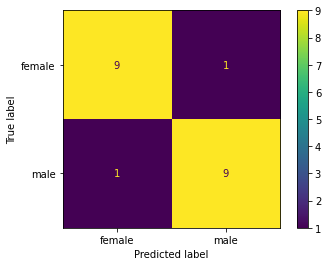

In [26]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
classifier = GaussianNB()

classifier.fit(X_train,Y_train)
y_pred = classifier.predict(X_test)
print("accuracy = ", accuracy_score(Y_test, y_pred))

plot_confusion_matrix(classifier, X_test, Y_test)